In [1]:
import numpy as np
import pandas as pd
file_path = '/content/insurance.csv'
data = pd.read_csv(file_path)


In [2]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
p_smoker = (data['smoker'] == 'yes').mean()
n = 10

In [4]:
from scipy.stats import binom
prob_at_least_4 = 1 - binom.cdf(3, n, p_smoker)
print(f"Probability that at least 4 out of 10 are smokers: {prob_at_least_4:.4f}")

Probability that at least 4 out of 10 are smokers: 0.1295


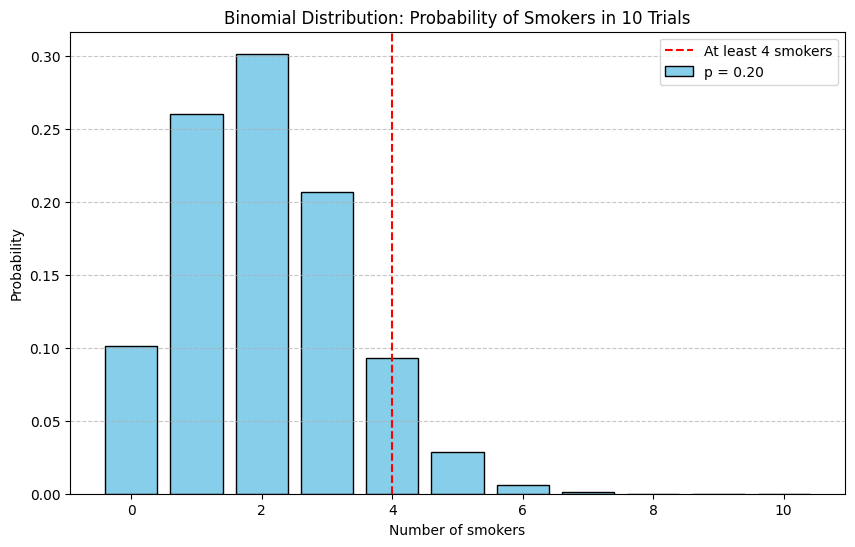

In [5]:
import matplotlib.pyplot as plt
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p_smoker)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black', label=f'p = {p_smoker:.2f}')
plt.axvline(x=4, color='red', linestyle='--', label='At least 4 smokers')
plt.title('Binomial Distribution: Probability of Smokers in 10 Trials')
plt.xlabel('Number of smokers')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()












Probability that exactly 5 out of 15 have expenses above $20,000: 0.1032
Cumulative probability that at most 5 out of 15 have expenses above $20,000: 0.9389


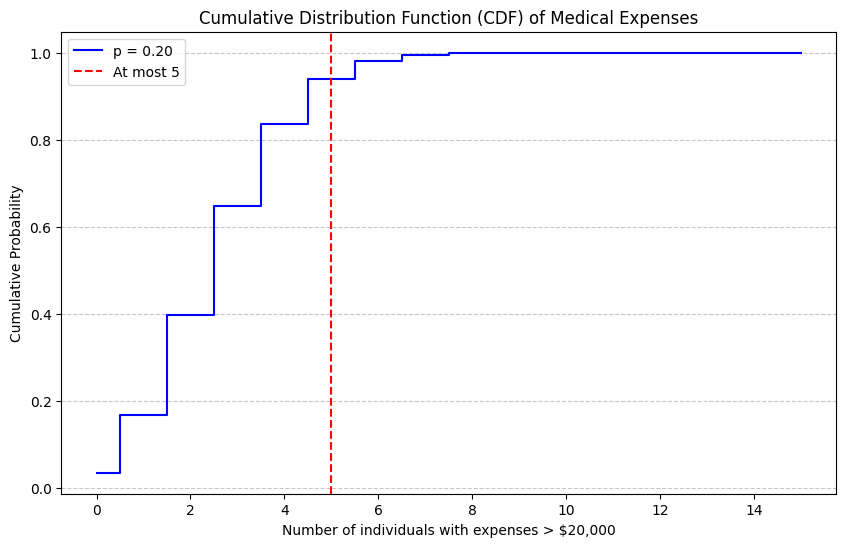

In [6]:
p_expenses = 0.20
n = 15
prob_exactly_5 = binom.pmf(5, n, p_expenses)
print(f"Probability that exactly 5 out of 15 have expenses above $20,000: {prob_exactly_5:.4f}")
cumulative_prob_at_most_5 = binom.cdf(5, n, p_expenses)
print(f"Cumulative probability that at most 5 out of 15 have expenses above $20,000: {cumulative_prob_at_most_5:.4f}")
x = np.arange(0, n + 1)
y = binom.cdf(x, n, p_expenses)

plt.figure(figsize=(10, 6))
plt.step(x, y, where='mid', color='blue', label=f'p = {p_expenses:.2f}')
plt.axvline(x=5, color='red', linestyle='--', label='At most 5')

plt.title('Cumulative Distribution Function (CDF) of Medical Expenses')
plt.xlabel('Number of individuals with expenses > $20,000')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




Southwest simulated successfully
Southeast simulated successfully
Northwest simulated successfully
Northeast simulated successfully


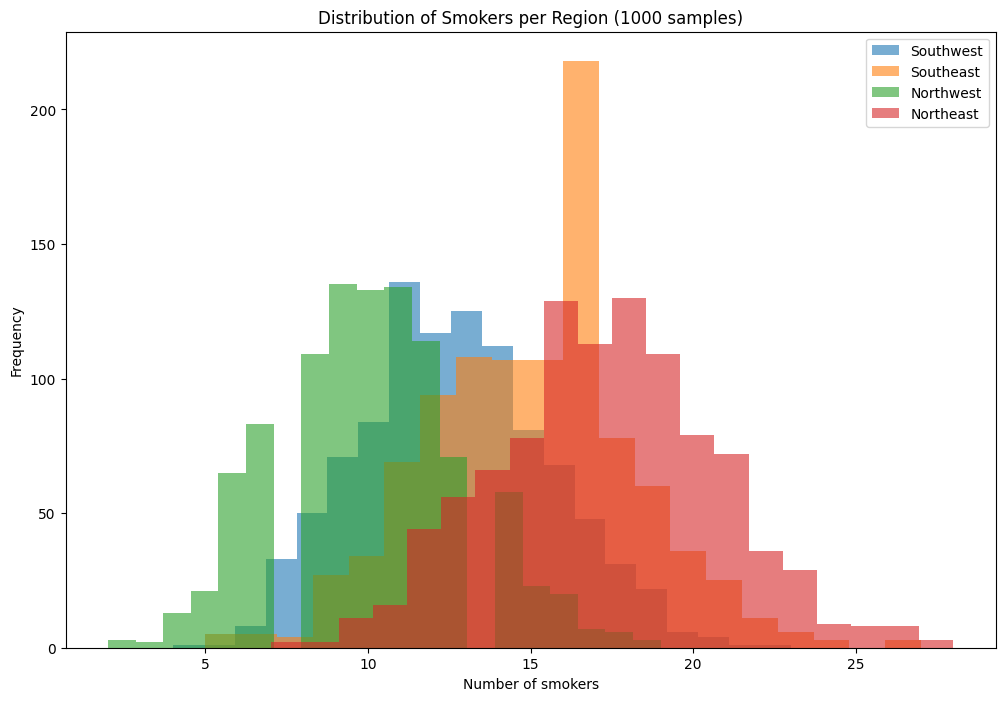

Southwest - Expected: 12.50, Simulated Mean: 12.60
Southeast - Expected: 15.00, Simulated Mean: 14.97
Northwest - Expected: 10.00, Simulated Mean: 10.08
Northeast - Expected: 17.50, Simulated Mean: 17.32


In [7]:
regions = {'Southwest': 0.25, 'Southeast': 0.30, 'Northwest': 0.20, 'Northeast': 0.35}
n = 50
samples = {}
for region, p in regions.items():
    samples[region] = np.random.binomial(n, p, 1000)
    print(f"{region} simulated successfully")
plt.figure(figsize=(12, 8))
for region in regions.keys():
    if region in samples:
        plt.hist(samples[region], bins=20, alpha=0.6, label=region)
    else:
        print(f"Missing data for {region}")

plt.title('Distribution of Smokers per Region (1000 samples)')
plt.xlabel('Number of smokers')
plt.ylabel('Frequency')
plt.legend()
plt.show()
for region, p in regions.items():
    expected = n * p
    if region in samples:
        mean_simulated = np.mean(samples[region])
        print(f"{region} - Expected: {expected:.2f}, Simulated Mean: {mean_simulated:.2f}")
    else:
        print(f"No simulated data for {region}")


Threshold for top 10% most expensive claims: $34831.72
Probability of selecting 8 high-risk individuals: 0.0058


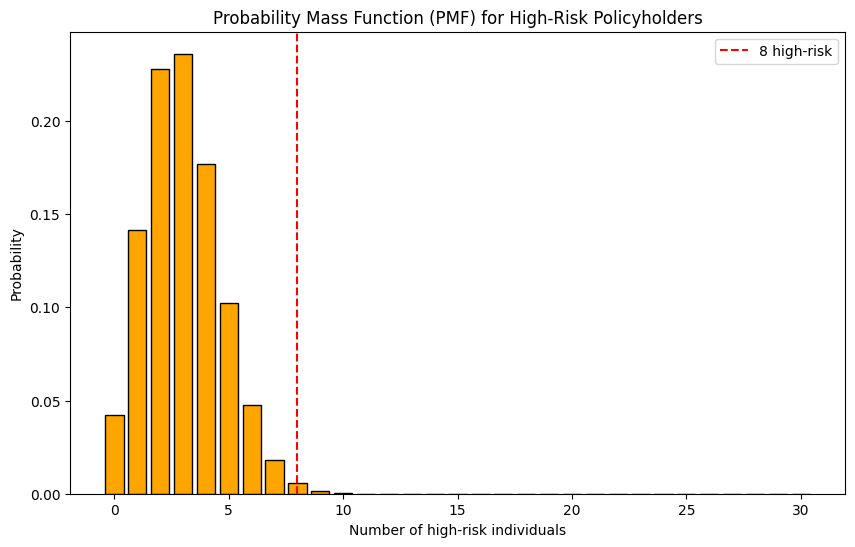

In [8]:
threshold = np.percentile(data['expenses'], 90)
print(f"Threshold for top 10% most expensive claims: ${threshold:.2f}")
p_high_risk = 0.10
n = 30
prob_8_high_risk = binom.pmf(8, n, p_high_risk)
print(f"Probability of selecting 8 high-risk individuals: {prob_8_high_risk:.4f}")
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p_high_risk)

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='orange', edgecolor='black')
plt.axvline(x=8, color='red', linestyle='--', label='8 high-risk')

plt.title('Probability Mass Function (PMF) for High-Risk Policyholders')
plt.xlabel('Number of high-risk individuals')
plt.ylabel('Probability')
plt.legend()
plt.show()


Probability that at least 5 out of 12 have more than 3 children: 0.5618


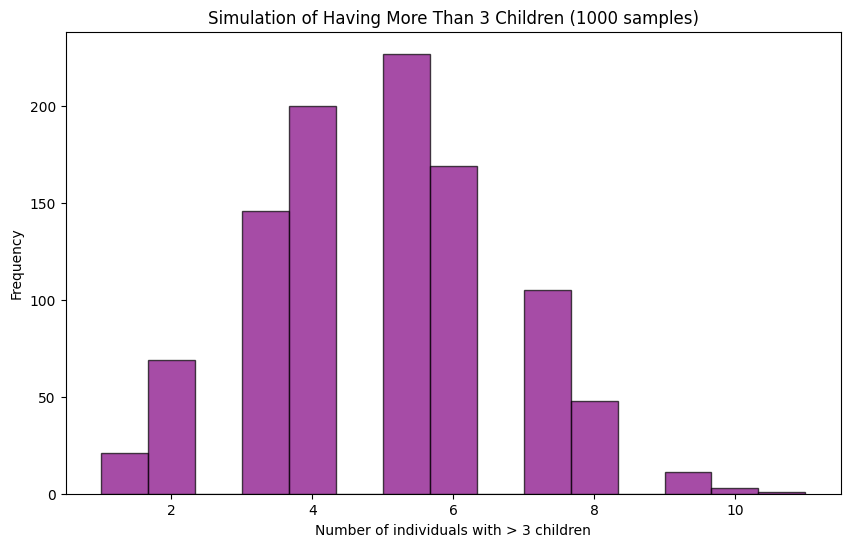

Theoretical Mean: 4.80, Simulated Mean: 4.80
Theoretical Variance: 2.88, Simulated Variance: 3.01


In [9]:
p_more_than_3 = 0.40
n = 12
prob_at_least_5 = 1 - binom.cdf(4, n, p_more_than_3)
print(f"Probability that at least 5 out of 12 have more than 3 children: {prob_at_least_5:.4f}")

samples = np.random.binomial(n, p_more_than_3, 1000)
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=15, color='purple', alpha=0.7, edgecolor='black')
plt.title('Simulation of Having More Than 3 Children (1000 samples)')
plt.xlabel('Number of individuals with > 3 children')
plt.ylabel('Frequency')
plt.show()
mean_simulated = np.mean(samples)
variance_simulated = np.var(samples)

mean_theoretical = n * p_more_than_3
variance_theoretical = n * p_more_than_3 * (1 - p_more_than_3)

print(f"Theoretical Mean: {mean_theoretical:.2f}, Simulated Mean: {mean_simulated:.2f}")
print(f"Theoretical Variance: {variance_theoretical:.2f}, Simulated Variance: {variance_simulated:.2f}")
